# Data Visualisation

This week we're going to be focusing on data visualisation with Python. We'll look at 4 libraries, but focus heavily on `matplotlib` because it's the "grandfather" library that offers the most control:

* `matplotlib`
* `seaborn`
* `altair`
* `bokeh`

# matplotlib

* We've already seen `matplotlib` plots through the `pandas` plotting and the first session.
* It's a very old, very mature library that is extremely powerful but a bit clumsy
* Holds the title for "most asked question" on stackoverflow with "How do I change the size of a figure?"
* 3 methods for plotting - we've already seen one in the first session (pyplot API). Start by recapping this
* Second is the object orientated method. This is what you should be using if you put any effort whatsoever in the plot!
* Third is the pylab API. This is depreciated but important to know it exists because you might see it in the wild.


In [ ]:
# Start by importing
import matplotlib.pyplot as plt

# Will also need numpy and pandas for data
import numpy as np
import pandas as pd


You might ask why we are only importing the `pyplot` sublibrary - this is a common issue if you make your own libraries; where do you put the "backend" functions that aren't used 90% of the time? `matplotlib` puts the common objects in the `pyplot` sublibrary and have everything else hanging out in other sublibraries, whereas other libraries will have backend functions in a `core` or `backend` library for example.

You might use the backend functions for specific cases, for example defining custom axis scaling, colourmaps etc.

Let's look at the pyplot api:

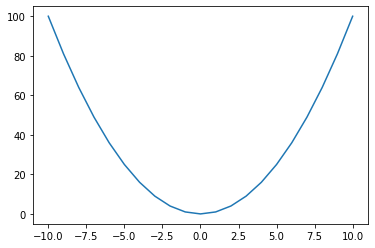

In [ ]:
# Get the numbers from -10 to 10
x = np.arange(-10, 11)

# Square numbers
y = x ** 2

# Plot 
plt.plot(x, y)
plt.show()

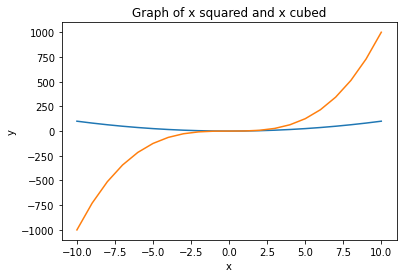

In [ ]:
# We can plot two lines on the same graph by calling plot mutliple times,
plt.plot(x, x ** 2)
plt.plot(x, x ** 3)

# Can also label axis using functions
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of x squared and x cubed")

plt.show()

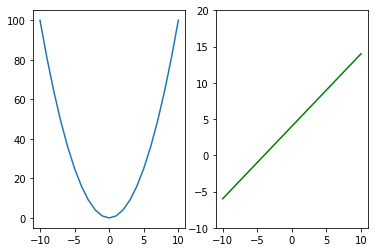

In [ ]:
# We can also do simple sublplots - the syntax here shows the limitation of the api

plt.subplot(1, 2, 1)
plt.plot(x, x ** 2)

plt.subplot(1, 2, 2)
plt.plot(x, x + 4, c="g")

# Functions like ylim set the y limits of a plot... but which one?!
plt.ylim(-10, 20)

plt.show()

Time to have a moan:

* This works fine but starts to fall apart if we really want to tinker with the graph.
* We don't have direct axis to the figure or axis objects so if we want to change the figure size it's a massive faff.
* We lose a lot of functionality this way - or at the very least, things get exponentially harder the more you want to do, up to "jump-out-the-window" levels of unintuitiveness.
* Of course, all of this is in my opinion, if you really vibe with the above method, keep using it; but I (along with the MPL authors!) really recommend using the following method!!!

## Object orientated matplotlib plots

Every OO matplotlib plot starts with defining a figure and axis. We can do this manually:

In [ ]:
fig = plt.figure()

# Note we have options to show the plot now - fig.show() or plt.show() will work.
# I use fig.show() out of habit!

fig.show()

<Figure size 432x288 with 0 Axes>

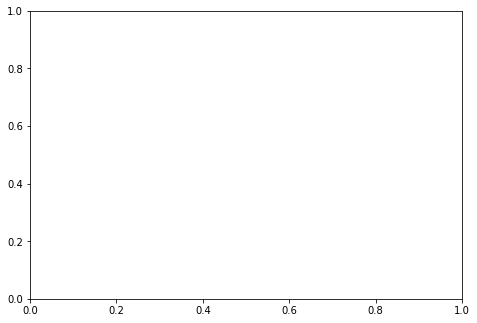

In [ ]:
# We get nothing out. We have a "blank canvas" to work on now 
# - let's add some axis!

# Syntax is a bit weird.
# Numbers are left, bottom, width, height - that is distance from
# left + bottom, and width and height as proportions of the figure

# I'm redefining the figure here because I think notebooks have a problem with
# adding axes like this over multiple cells. The next method doesn't have this
# problem!
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

fig.show()

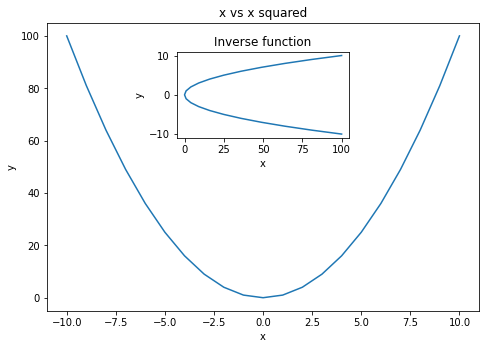

In [ ]:
# This way is good for is you want multiple axis in a non-grid format.
# Example:

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 1])

# Now add another axis within ax1
ax2 = fig.add_axes([0.3, 0.6, 0.4, 0.3])

# Now we have access to each axis object independently, instead of being at the 
# mercy of matplotlib!

ax1.plot(x, x ** 2)
ax2.plot(x ** 2, x)

# We can set induvidual titles, labels for each axis.
# Note the syntax is different!

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('x vs x squared')

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Inverse function')

fig.show()

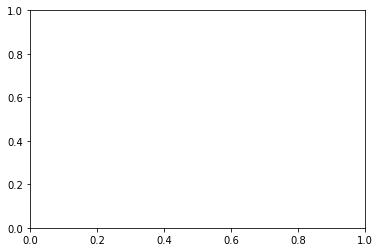

In [ ]:
# So we have a new axis object, but there's a better way of doing this:
# This will do all of the above
fig, ax = plt.subplots()

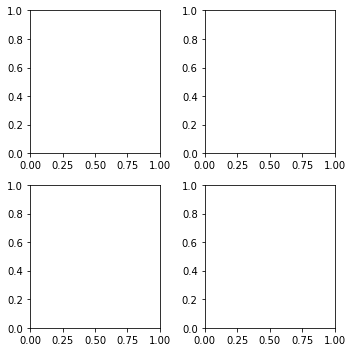

In [ ]:
# Subplots function is very helpful. The important features of this is
# splitting the plot into a grid + setting figure size

# The bracket hell here is called "tuple unpacking" and comes from the output
# of the subplots function. It's always two objects (a figure and a axis array)
# but Python allows us to assign variables in the array using this syntax.

# Otherwise the syntax fig, axes then axes[0][0] etc would work!
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

# Problem with this plot is that it's a bit tight. The best way to deal with this
# is calling plt.tight_layout, which basically reorganises the plot to make everything
# fit

plt.tight_layout()
fig.show()

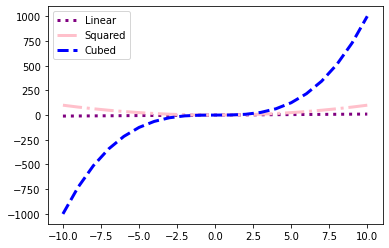

In [ ]:
# The plot function gives us line plots. Good thing about the OO method
# is that these will output a lineplot object we can refer to later for 
# advanced plots.

# Tons of options below

fig, ax = plt.subplots()

line1 = ax.plot(x,x, label='Linear', color = "purple", lw=3,ls=':')
line2 = ax.plot(x,x**2, label='Squared', color = "pink", lw =3,ls='-.')
line3 = ax.plot(x,x**3, label='Cubed', color = "blue", lw=3,ls='--')

# Add a legend using the labels defined above
ax.legend()

fig.show()

In [ ]:
# There's a lot of plot types with matplotlib. I'll explain them as/when needed
# but again look at the documentation!

# Let's look at a real life problem that we can visualise.

# A local authority has a grey squirrel problem - the species is highly invasive
# and overtaking the local red squirrel population. The authority has bought in
# measures to try and offset this issue - and have taken periodic sample of the
# net difference between red and grey squirrels over time to log the efficacy
# of the measures. As a new recruit to the squirrel taskforce, your job is to
# clearly communicate the findings of the group, and create visualisations for
# publications. The group also intends to publish a model of red squirrel growth
# using the data they have gathered - in another column of the data there is the 
# model outputs for our known data. 

# In the "model_test.csv" file we have 2 columns of data, the real values
# and the values a model of mine has predicted.
# Let's graph the values and predictions on one plot, and the error
# on another!

!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/model_test.csv"

--2021-05-08 13:03:37--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Week_2/model_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5843 (5.7K) [text/plain]
Saving to: ‘model_test.csv’

model_test.csv      100%[===================>]   5.71K  --.-KB/s    in 0s      

2021-05-08 13:03:37 (67.1 MB/s) - ‘model_test.csv’ saved [5843/5843]



In [ ]:
# First let's import the data.
predictions = pd.read_csv("model_test.csv", index_col=0)

predictions

,x,true,predicted
0,2.000000,-205.583923,-492.630687
1,2.424242,-240.287675,-475.331878
2,2.848485,-175.340207,-458.033069
3,3.272727,-231.737573,-440.734260
4,3.696970,-187.750353,-423.435451
...,...,...,...
95,42.303030,1403.631001,1150.756173
96,42.727273,1413.198112,1168.054982
97,43.151515,1368.736706,1185.353791
98,43.575758,1504.481408,1202.652600


In [ ]:
# Calculate the error for each point
predictions["error"] = predictions["true"] - predictions["predicted"]

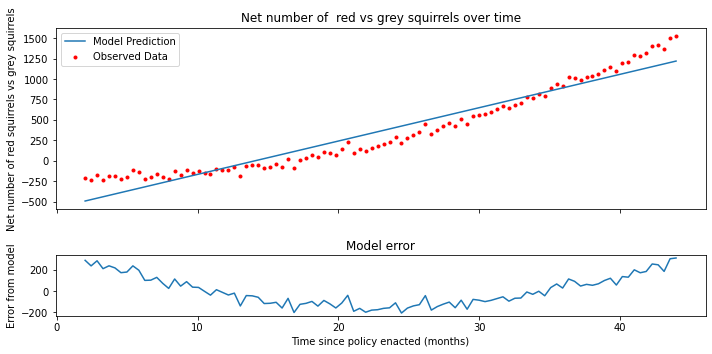

In [ ]:
# Now let's make two plots - one for the data itself, and one 
# for the error.

# Define our fig, axes
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(10, 5), 
                               gridspec_kw={'height_ratios': [3, 1]},
                               sharex=True)

# Plot our data
ax1.scatter(predictions["x"], predictions["true"], c="red", marker=".", label="Observed Data")
ax1.plot(predictions["x"], predictions["predicted"], label="Model Prediction")

ax2.plot(predictions["x"], predictions["error"])

# Let's add labels and a legend
ax1.set_ylabel("Net number of red squirrels vs grey squirrels")
ax2.set_ylabel("Error from model")
ax2.set_xlabel("Time since policy enacted (months)")
ax1.legend()

# Add axis titles
ax1.set_title("Net number of  red vs grey squirrels over time")
ax2.set_title("Model error")
# Looks like our vis is a bit close - let's fix that
plt.tight_layout()

# Activity

This activity is about exploring using the different matplotlib plots and practicing using the syntax.

For every question, the following is required:

* All x & y axes must be labelled with a sensible label, and each set of axes must have an appropriate title.
* Where two pieces of data are plotted on one graph, include a legend.
* Make sure all graphs are appropriately size and no text is overlapping each other.
* Save each plot as a png using the `plt.savefig()` function.

## 2.1

Graphing time series data is a common task, particularly for financial data science. The file `stocks.csv` is an edicted dataset of stock prices taken up to late 2017 (https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs).

NOTE: There are a significant amount of N/A entries in this dataset - you will need to think about how to approach this problem!

* Graph the historical data of these stocks, with different colours and linestyles for each stock.
* Your x axis labels will look a bit strange. Change them to something sensible by using the `set_xticks` and `set_xticklabels` functions.
* Add vertical lines for important historical events (when companies start publically trading stock etc).


## 2.2

The file `world_bank.csv` has data taken from the World Bank (https://data.worldbank.org/) detailing GDP, Population and Life Expectancy.

* Plot the GDP of countries vs their average life expectancy as a scatter graph, with the size of each point being proportional to the population of the country.
* BONUS: Colour the points by the continent of each country - you'll need to source a list of countries and continents, and convert them to a colour in some way. There are a lot of ways to do this but is very helpful to learn!

## 2.3 

Let's take another look at the `housing.csv` dataset from before, and create some plots we wouldn't be able to do using `pandas`.

* Create two bar charts in one figure, one for the house prices by number of bathrooms, and one for if the property has a driveway or not.
* BONUS: Now create another bar chart with this data grouped - so x axis is number of bathrooms and y axis is house price as before, but each entry has two bars. This is a bit fiddley to do - but should teach you a lot about what the bar chart function is actually doing! Help can be found here: (https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)


In [ ]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/stocks.csv"
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/world_bank.csv"
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/housing.csv"

--2021-05-08 13:03:38--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Week_2/stocks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318090 (311K) [text/plain]
Saving to: ‘stocks.csv’

stocks.csv          100%[===================>] 310.63K  --.-KB/s    in 0.04s   

2021-05-08 13:03:39 (7.73 MB/s) - ‘stocks.csv’ saved [318090/318090]

--2021-05-08 13:03:39--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Week_2/world_bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12105 (12K) [text/pla

# Other visualisation options



`matplotlib` isn't the only visualisation library in Python, but is the most frequently used. Let's look at what else is out there:

`seaborn` is a layer on top of `matplotlib` that gets us very quick, very nice looking plots without a lot of work.



In [ ]:
# Let's use the iris dataset again for an easy example 

In [ ]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv"

--2021-05-08 13:03:40--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Week_1/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4351 (4.2K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.25K  --.-KB/s    in 0s      

2021-05-08 13:03:41 (60.2 MB/s) - ‘iris.csv’ saved [4351/4351]



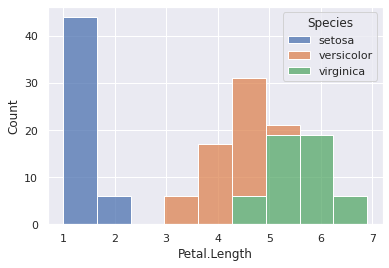

In [ ]:
# seaborn
import seaborn as sns

iris = pd.read_csv("iris.csv", index_col=0)

# Have to run this line to get it looking nice

sns.set_theme()

# one line histogram plot with stacked grouping
sns.histplot(data=iris, x="Petal.Length", hue="Species", multiple="stack")
plt.show()

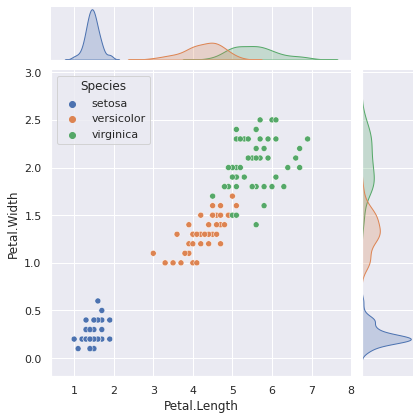

In [ ]:
# scatter plots look a lot nicer this way
sns.jointplot(data=iris, x="Petal.Length", y="Petal.Width", hue="Species")

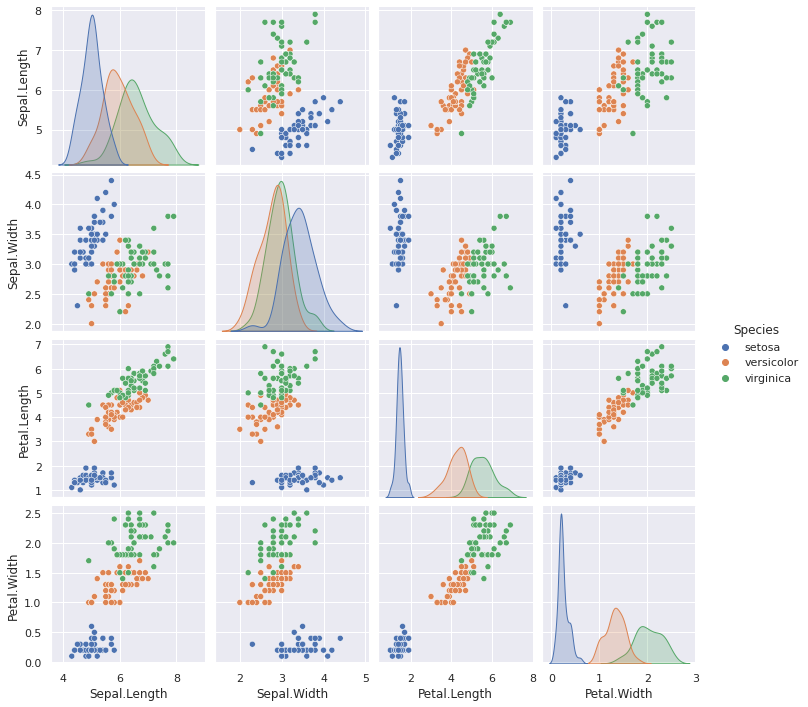

In [ ]:
# but perhaps the best thing about seaborn is the pairplot function
# this is a heavy function but instantly gives us a top down view
# of our data. We can instantly see some factors that will be helpful
# in classification. It intelligently choses the right plot
# for the type of data.
sns.pairplot(data=iris, hue="Species")


`altair` allows interative plots based on the `vega` visualisation backend, which is more cohesive with hosting online. 

It uses a more functional way of creating plots, by chaining together methods - this is what is also seen in other visualisation libraries like `d3.js`.

In [ ]:
import altair as alt

from vega_datasets import data
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='sepalLength',
    y='sepalWidth',
    color="species"
).interactive()

alt.Chart(...)

Finally, `bokeh` is another alternative for interactive visualisations.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral4

# Force bokeh to output using the notebook
output_notebook()

# Turn our dataset into something bokeh likes
source = ColumnDataSource(iris)

# Make figure
p = figure(title="Sepal Length vs Sepal Widths", 
           x_axis_label='Sepal Length', 
           y_axis_label='Sepal Widths')

# Get colour mapping
p.scatter(x="sepalLength", 
          y="sepalWidth",
          source=source,
          color=factor_cmap(field_name="species", 
                            palette=Spectral4, 
                            factors=["setosa", "versicolor", "virginica"]))

show(p)